# Twitter sentiment analysis model
[Click here](https://www.kaggle.com/kazanova/sentiment140) for Dataset 

## Project Pipeline 
1. Import Necessary Dependencies
2. Read and Load the Dataset
3. Exploratory Data Analysis
4. Data Visualization of Target Variables
5. Data Preprocessing
6. Splitting our data into Train and Test Subset
7. Transforming Dataset using TF-IDF Vectorizer
8. Function for Model Evaluation
9. Model Building

## 1. Import library

In [84]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## 2. Load Dataset

In [85]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
df=pd.read_csv("/content/drive/MyDrive/NLP/Twitter_SentimentAnalysis/training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=DATASET_COLUMNS)
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


## 3. Exploratory Data Analysis

1. Display record

In [86]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


2. shape of Dataset

In [87]:
df.shape

(1600000, 6)

3. Dataset Information

In [88]:
print(df.info())
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None
target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


4. Checking NULL Values

In [89]:
df.isnull().any(axis=0)

target    False
ids       False
date      False
flag      False
user      False
text      False
dtype: bool

5. Checking Traget Values

In [90]:
df["target"].unique()

array([0, 4])

## 4. Data Visualization

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

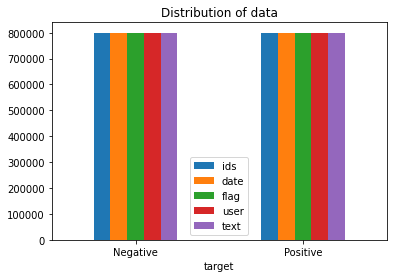

In [91]:
# Ploting the Distribution for Data
ax = df.groupby('target').count().plot(kind='bar', title="Distribution of data")
ax.set_xticklabels(['Negative','Positive'],rotation=0)


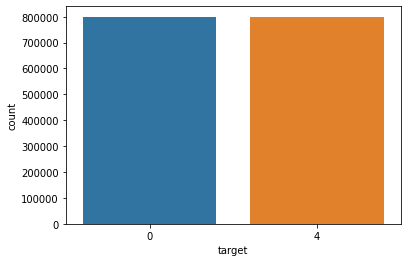

In [92]:
# total count of data
sns.countplot(x='target',data=df)

## 5. Data Preprocessing


* Performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. 
* The text document is then converted into the lowercase for better generalization.
*  The punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset.
*  Also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.
* Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.



In [93]:
# Selecting the text and Target column for our further analysis   dfmi.loc[:, ('one', 'second')]
data=df.loc[:, ('text','target')]
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [94]:
#Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4) 
data['target']=data['target'].replace(4,1)
data['target'].unique()

array([0, 1])

In [95]:
#Separating positive and negative tweets
pos=data[data['target']==1]
neg=data[data['target']==0]


In [44]:
#taking less so we can run on our machine easily
pos=pos.iloc[:int(8000)]
neg=neg.iloc[:int(8000)]

In [96]:
#Combining positive and negative tweets
dataset=pd.concat([pos,neg])
dataset.shape

(1600000, 2)

In [97]:
#Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset.tail()

,text,target
799995,sick spending my day laying in bed listening ...,0
799996,gmail is down?,0
799997,rest in peace farrah! so sad,0
799998,@eric_urbane sounds like a rival is flagging y...,0
799999,has to resit exams over summer... wishes he w...,0


In [99]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# removing stopwords and Lemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

def cleaning_stopwords(text):
    return " ".join([lem.lemmatize(word) for word in str(text).split() if not word in stopwords.words("english")])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()   

In [50]:
# Cleaning and removing punctuations
import string
punctuations_list=string.punctuation
print(punctuations_list)
def cleaning_punctuations(text):
  translator=str.maketrans("","", punctuations_list)
  return text.translate(translator)
dataset['text']=dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


7995           bradshawme snow hit eye literally made cry
7996    phone off new number way reach then me message...
7997    arrrggghhhhhhhhh cant put picture upits stoooopid
7998                         hypnosadism without words oy
7999                         woz summin rng tht cream egg
Name: text, dtype: object

In [51]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

7995           bradshawme snow hit eye literally made cry
7996    phone off new number way reach then me message...
7997    arrrggghhhhhhhhh cant put picture upits stoooopid
7998                         hypnosadism without words oy
7999                         woz summin rng tht cream egg
Name: text, dtype: object

In [ ]:
#Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

In [52]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
  return re.sub("[0-9]+","",data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()


7995           bradshawme snow hit eye literally made cry
7996    phone off new number way reach then me message...
7997    arrrggghhhhhhhhh cant put picture upits stoooopid
7998                         hypnosadism without words oy
7999                         woz summin rng tht cream egg
Name: text, dtype: object

In [53]:
#Separating input feature and label
X=data.text
y=data.target

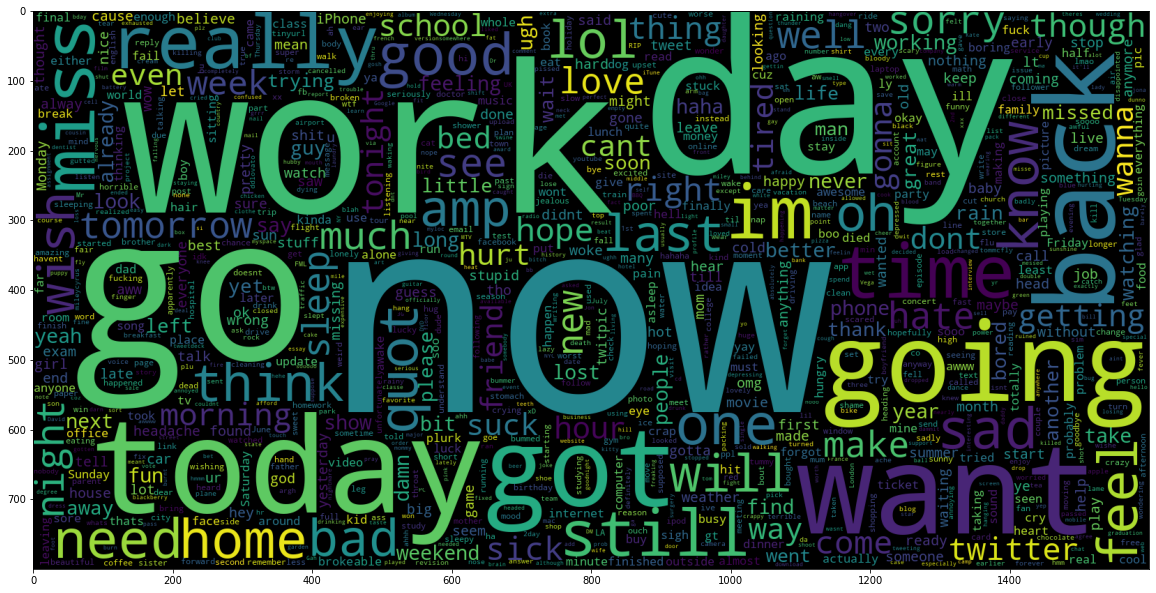

In [60]:
#Plot a cloud of words for negative tweets
neg=data[data['target']==0]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000,
               collocations=False).generate(" ".join(neg))
plt.imshow(wc)

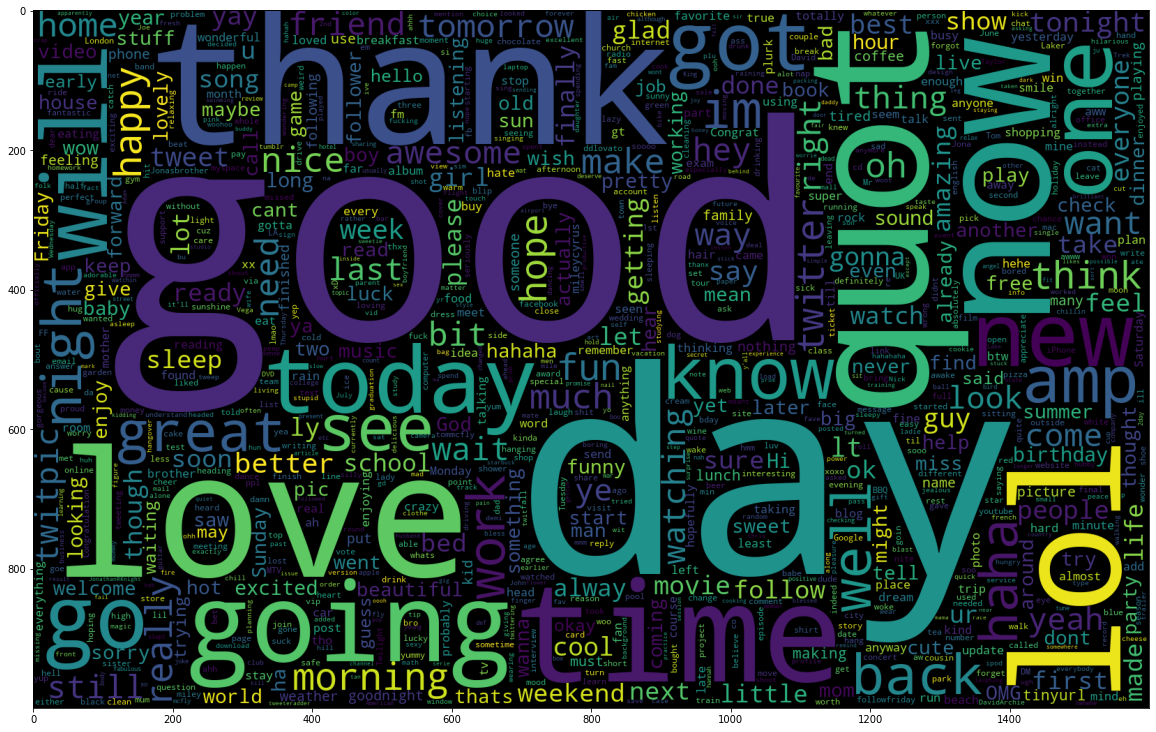

In [62]:
#Plot a cloud of words for positive tweets
pos=data[data['target']==1]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 1000,
               collocations=False).generate(" ".join(pos))
plt.imshow(wc)


## 6. Splitting our data into Train and Test Subset

In [64]:
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =21)

## 7. Transforming Dataset using TF-IDF Vectorizer

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit(X_train)
print(len(tfidf.get_feature_names()))

638161


In [66]:
X_train= tfidf.transform(X_train)
X_test=tfidf.transform(X_test)

## 8. Function For Model Evaluation

In [80]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
  plt.figure(figsize = (8,8))
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg ','False Pos ', 'False Neg ','True Pos ']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':20}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':20}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()
  print("\n\nROC Curve")
  #ROC Curve
  from sklearn.metrics import roc_curve, auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend(loc="lower right")
  plt.show()

## 9. Model Building

### Model 1 : **Bernoulli Naive Bayes**

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     79948
           1       0.80      0.76      0.78     80052

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



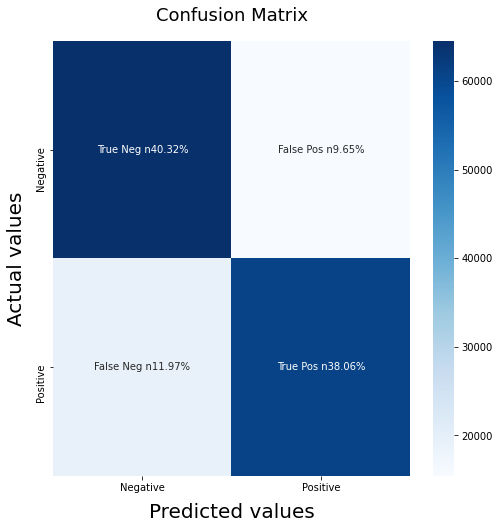



ROC Curve


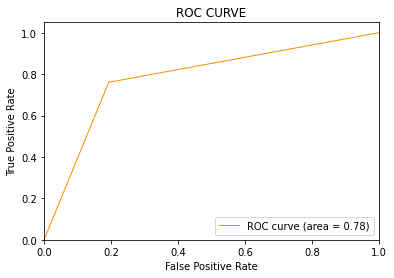

In [81]:
BNB=BernoulliNB()
BNB.fit(X_train,y_train)
model_Evaluate(BNB)


### Model 2 : **SVM (Support Vector Machine)**




              precision    recall  f1-score   support

           0       0.80      0.79      0.80     79948
           1       0.79      0.80      0.80     80052

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



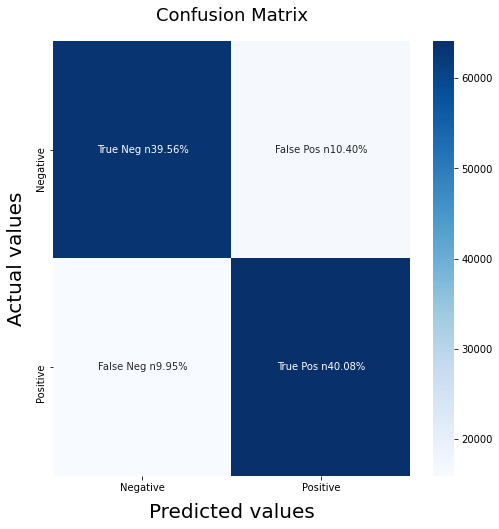



ROC Curve


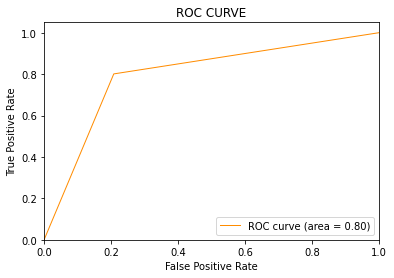

In [82]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

### Model 3 : **Logistic Regression**

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     79948
           1       0.80      0.81      0.80     80052

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



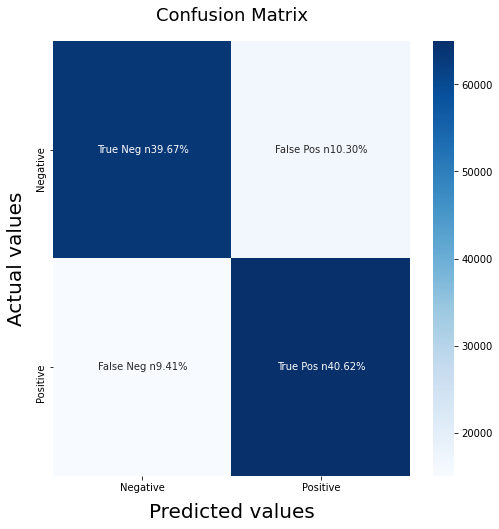



ROC Curve


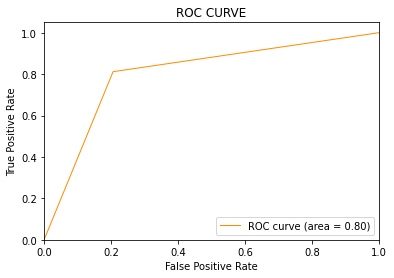

In [83]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)